### Name : Ayodya W.K.H
### Index No : 190065K

## Question 1
Implement the intensity transformation depicted in Fig.1a on the image shown in Fig.1b.

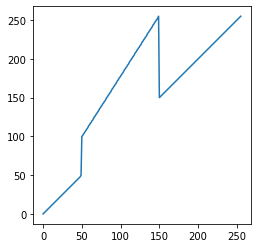

In [66]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Img = cv.imread('emma_gray.jpg')
assert Img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
figure, axis = plt.subplots()
axis.plot(t)
axis.set_aspect('equal')
assert len(t) == 256
new_Img = cv.LUT(Img,t)

cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow('Image',Img)
cv.waitKey(0)
cv.imshow('Image',new_Img)
cv.waitKey(0)
cv.destroyAllWindows()

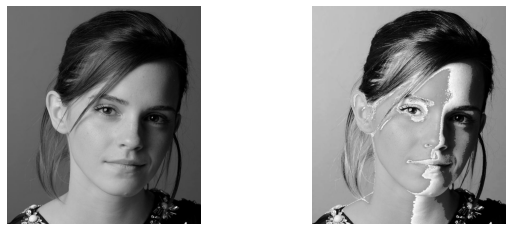

In [67]:
figure, axis = plt.subplots(1,2)
figure.set_figwidth(10)

axis[0].imshow(cv.cvtColor(Img, cv.COLOR_BGR2RGB))
axis[0].axis('off')
axis[1].imshow(cv.cvtColor(new_Img, cv.COLOR_BGR2RGB))
axis[1].axis('off')
plt.show()

### Question 2
Apply a similar operation as above (question 1) to accentuate <br>
(a) white matter<br>
(b) gray matter<br>
in the brain proton density image shown in Fig.2. Show the intensity transformations as a plots. 

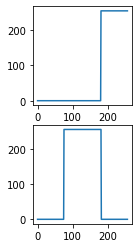

In [127]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Img = cv.imread('brain_proton_density_slice.png')
assert Img is not None

t1 = (255)*np.ones(0)
t2 = np.zeros(180)
t3 = (255)*np.ones(76)

t_1 = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

T1 = np.zeros(75)
T2 = (255)*np.ones(106)
T3 = np.zeros(75)

t_2 = np.concatenate((T1,T2,T3),axis=0).astype(np.uint8)

figure, axis = plt.subplots(2)
figure.set_figwidth(10)

axis[0].plot(t_1)
axis[0].set_aspect('equal')
axis[1].plot(t_2)
axis[1].set_aspect('equal')
assert len(t_1) == 256
white_Img = cv.LUT(Img,t_1)
assert len(t_2) == 256
gray_Img = cv.LUT(Img,t_2)

cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow('Image',Img)
cv.waitKey(0)
cv.imshow('Image',white_Img)
cv.waitKey(0)
cv.imshow('Image',gray_Img)
cv.waitKey(0)
cv.destroyAllWindows()

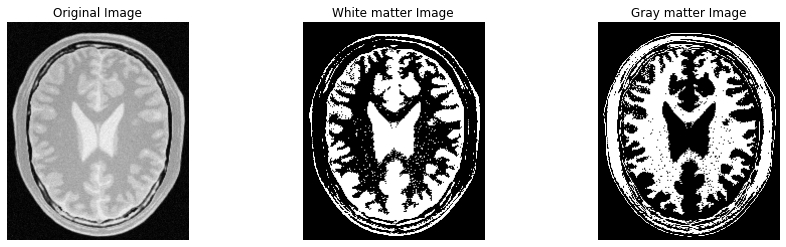

In [129]:
figure, axis = plt.subplots(1,3)
figure.set_figwidth(15)

axis[0].imshow(cv.cvtColor(Img, cv.COLOR_BGR2RGB))
axis[0].axis('off')
axis[0].title.set_text('Original Image')
axis[1].imshow(cv.cvtColor(white_Img, cv.COLOR_BGR2RGB))
axis[1].axis('off')
axis[1].title.set_text('White matter Image')
axis[2].imshow(cv.cvtColor(gray_Img, cv.COLOR_BGR2RGB))
axis[2].axis('off')
axis[2].title.set_text('Gray matter Image')
plt.show()

### Question 3
Consider the image shown in Fig.31. <br>
(a) Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value. <br>
(b) Show the histograms of the original and corrected images.

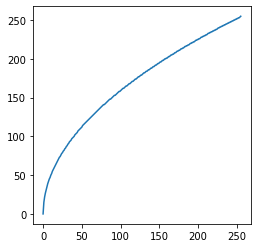

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Img = cv.imread('highlights_and_shadows.jpg')
assert Img is not None

lab_Img = cv.cvtColor(Img, cv.COLOR_BGR2LAB)
    
(L, A, B) = cv.split(lab_Img)

gamma = 0.5
t = np.array([(p/255)**gamma*255 for p in range (0,256)]).astype(np.uint8) 
G_Img = cv.LUT(L,t)
figure, axis = plt.subplots()
axis.plot(t)
axis.set_aspect('equal')

Final_Img = cv.merge([G_Img,A,B])


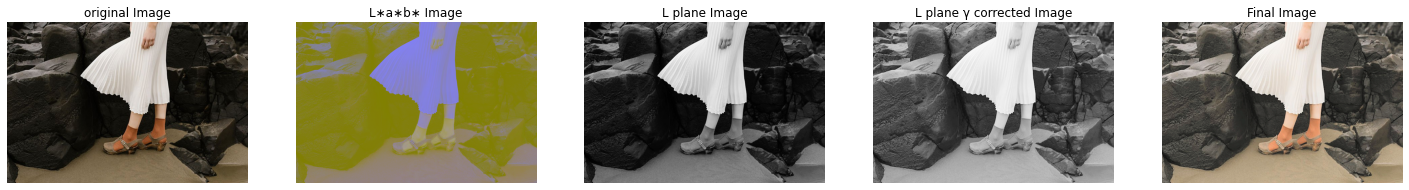

In [8]:
figure, axis = plt.subplots(1,5)
figure.set_figwidth(25)

axis[0].imshow(cv.cvtColor(Img, cv.COLOR_BGR2RGB))
axis[0].axis('off')
axis[0].title.set_text('original Image')
axis[1].imshow(cv.cvtColor(lab_Img, cv.COLOR_BGR2RGB))
axis[1].axis('off')
axis[1].title.set_text('L∗a∗b∗ Image')
axis[2].imshow(cv.cvtColor(L, cv.COLOR_BGR2RGB))
axis[2].axis('off')
axis[2].title.set_text('L plane Image')
axis[3].imshow(cv.cvtColor(G_Img, cv.COLOR_BGR2RGB))
axis[3].axis('off')
axis[3].title.set_text('L plane γ corrected Image')
axis[4].imshow(cv.cvtColor(Final_Img, cv.COLOR_LAB2RGB))
axis[4].axis('off')
axis[4].title.set_text('Final Image')
plt.show()

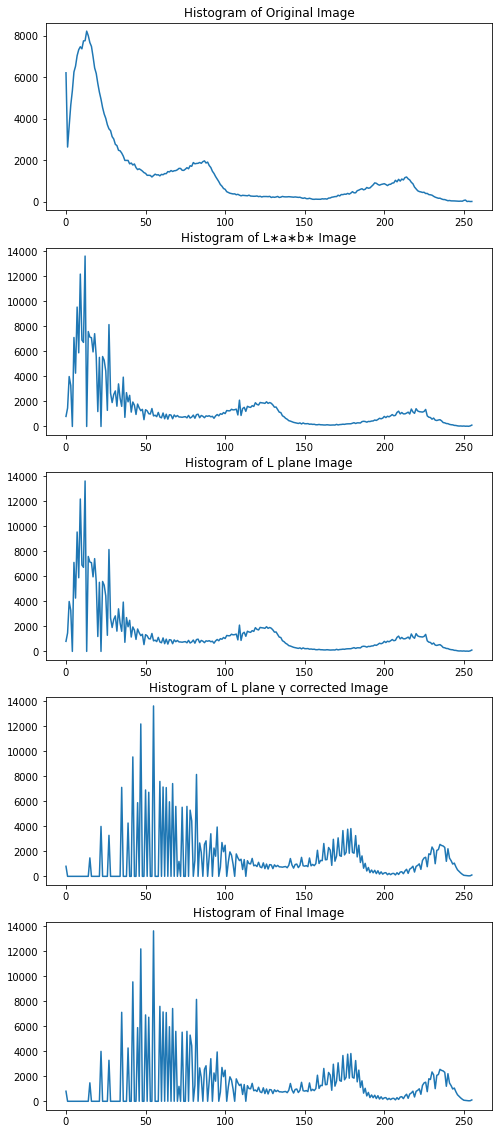

In [13]:
hist_Img = cv.calcHist([Img],[0], None, [256], [0,256])
hist_lab = cv.calcHist([lab_Img],[0], None, [256], [0,256])
hist_L = cv.calcHist([L],[0], None, [256], [0,256])
hist_G = cv.calcHist([G_Img],[0], None, [256], [0,256])
hist_F = cv.calcHist([Final_Img],[0], None, [256], [0,256])

figure, axis = plt.subplots(5,1, figsize = (8,20))
axis[0].plot(hist_Img)
axis[0].title.set_text('Histogram of Original Image')
axis[1].plot(hist_lab)
axis[1].title.set_text('Histogram of L∗a∗b∗ Image')
axis[2].plot(hist_L)
axis[2].title.set_text('Histogram of L plane Image')
axis[3].plot(hist_G)
axis[3].title.set_text('Histogram of L plane γ corrected Image')
axis[4].plot(hist_F)
axis[4].title.set_text('Histogram of Final Image')
plt.show()

### Question 4
Write a function of your own to carry out histogram equalization on the image shown in Fig.4. Show the histograms before and after equalization. 

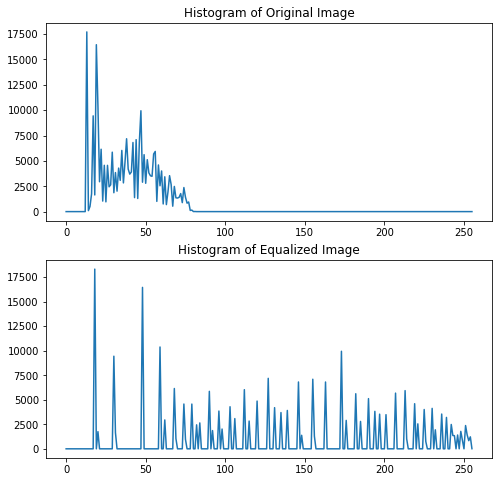

In [30]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Img = cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
assert Img is not None

def Equalize_Histogram(Image):
    hist,bins = np.histogram(Image.ravel(), 256, [0 ,256])

    cdf = hist.cumsum() 
    
    cdf = (cdf-cdf[0]) *255/(cdf[-1]-1)
    cdf = cdf.astype(np.uint8)
    Equ_Img = cdf[Image]

    return Equ_Img

hist,bins = np.histogram(Img.ravel(), 256, [0 ,256])
equ_Img = Equalize_Histogram(Img)
hist_e = cv.calcHist([equ_Img],[0], None, [256], [0,256])

figure, axis = plt.subplots(2,1, figsize = (8,8))
axis[0].plot(hist)
axis[0].title.set_text('Histogram of Original Image')
axis[1].plot(hist_e)
axis[1].title.set_text('Histogram of Equalized Image')
plt.show()

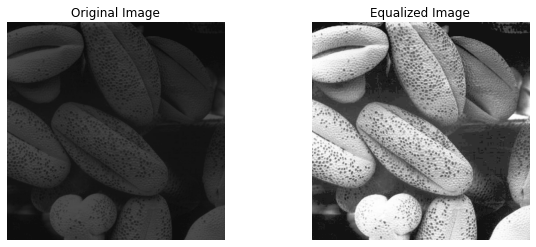

In [31]:
figure, axis = plt.subplots(1,2)
figure.set_figwidth(10)

axis[0].imshow(cv.cvtColor(Img, cv.COLOR_BGR2RGB))
axis[0].axis('off')
axis[0].title.set_text('Original Image')
axis[1].imshow(cv.cvtColor(equ_Img, cv.COLOR_BGR2RGB))
axis[1].axis('off')
axis[1].title.set_text('Equalized Image')
plt.show()

### Question 5
Write a program to zoom images by a given factor s ∈ (0, 10]. You must use a function to zoom the image, which can handle <br>
(a) nearest-neighbor, and <br>
(b) bilinear interpolation. <br>

I have included four images, two large originals, and there zoomed-out versions. Test you algorithm by computing the normalized sum of squared difference (SSD) when you scale-up the given small images by a factor of 4 by comparing with the original images.

### Question 6
Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig.5. <br>
(a) Using the existing filter2D to Sobel filter the image. <br>
(b) Write your own code to Sobel filter the image. <br>
(c) Using the property <br>
$$
\left(\begin{array}{cc} 1 & 0 & -1\\2 & 0 & -2\\1 & 0 & -1\end{array}\right) = 
\left(\begin{array}{cc} 1 \\ 2 \\ 1 \end{array}\right) *
\left(\begin{array}{cc} 1 & 0 & -1 \end{array}\right)
$$ 
carry out Sobel filtering.

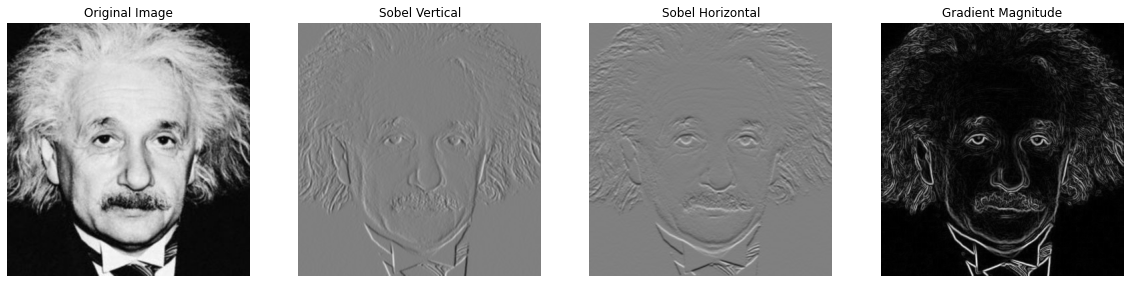

In [138]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert Img is not None

kernel_h = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype = 'float32')
f_y = cv.filter2D(Img, -1, kernel_h)

kernel_v = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype = 'float32')
f_x = cv.filter2D(Img, -1, kernel_v)
grad_mag = np.sqrt(f_x**2 + f_y**2)

figure, axis = plt.subplots(1,4, figsize = (20,20))

axis[0].imshow(Img, cmap = 'gray', vmin = 0, vmax = 255)
axis[0].axis('off')
axis[0].title.set_text('Original Image')
axis[1].imshow(f_x, cmap = 'gray', vmin = -1020, vmax = 1020)
axis[1].axis('off')
axis[1].title.set_text('Sobel Vertical')
axis[2].imshow(f_y, cmap = 'gray', vmin = -1020, vmax = 1020)
axis[2].axis('off')
axis[2].title.set_text('Sobel Horizontal')
axis[3].imshow(grad_mag, cmap = 'gray')
axis[3].axis('off')
axis[3].title.set_text('Gradient Magnitude')
plt.show()

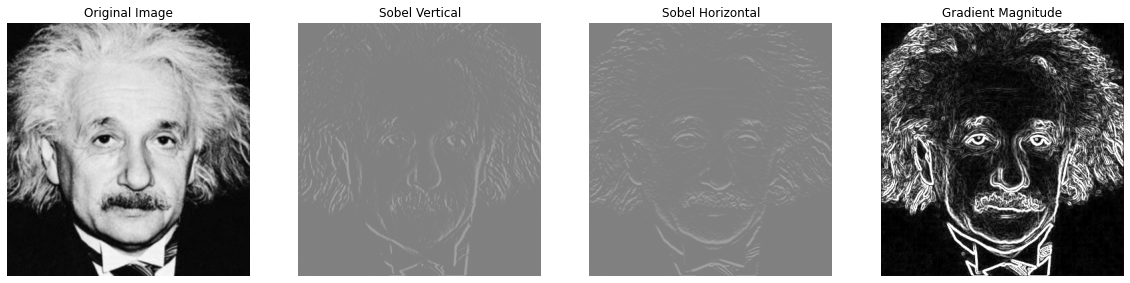

In [190]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
def pixel_value(X):
    if X >255:
        X = 255
    elif X<0:
        X = 0
    return X
        
        
def sobelOperator(img):
    container1 = np.copy(img)
    container2 = np.copy(img)
    container3 = np.copy(img)
    size = container1.shape
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            gx = (img[i - 1][j - 1] + 2*img[i][j - 1] + img[i + 1][j - 1]) - (img[i - 1][j + 1] + 2*img[i][j + 1] + img[i + 1][j + 1])
            gy = (img[i - 1][j - 1] + 2*img[i - 1][j] + img[i - 1][j + 1]) - (img[i + 1][j - 1] + 2*img[i + 1][j] + img[i + 1][j + 1])
            container1[i][j] = pixel_value(np.sqrt(gx**2 + gy**2))
            container2[i][j] = pixel_value(gx)
            container3[i][j] = pixel_value(gy)
    return container2,container3,container1

Img = cv2.cvtColor(cv2.imread("einstein.png"), cv2.COLOR_BGR2GRAY)
img = sobelOperator(Img)
figure, axis = plt.subplots(1,4, figsize = (20,20))

axis[0].imshow(Img, cmap = 'gray', vmin = 0, vmax = 255)
axis[0].axis('off')
axis[0].title.set_text('Original Image')
axis[1].imshow(img[0], cmap = 'gray', vmin = -1020, vmax = 1020)
axis[1].axis('off')
axis[1].title.set_text('Sobel Vertical')
axis[2].imshow(img[1], cmap = 'gray', vmin = -1020, vmax = 1020)
axis[2].axis('off')
axis[2].title.set_text('Sobel Horizontal')
axis[3].imshow(img[2], cmap = 'gray')
axis[3].axis('off')
axis[3].title.set_text('Gradient Magnitude')
plt.show()

### Question 7
Fig.6<sup>2</sup> shows a flower image with both the foreground and background are in focus.<br>
(a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and background image.<br>
(b) Produce an enhanced image with a substantially blurred background. Display the original image alongside the enhanced image.<br>
(c) Why is the background just beyond the edge of the flower quite dark in the enhanced image.